In [1]:
from functions import *
import glob
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings('ignore')

## Load test and train data

In [2]:
def load_data(train_ids, test_ids):
    train_data = {}
    test_data = {}
    
    for i in train_ids:
        train_data[i] = {}
        path = "train_data/user_{}/final_data/".format(i)
        dataframes = []
        for file in glob.glob(path + "/*"):
            dataframes.append(pd.read_csv(file))

        train_data[i]['data'] = pd.concat([i for i in dataframes])
        train_data[i]['X'] = train_data[i]['data'][:]
        train_data[i]['y'] = train_data[i]['X'].pop('user')
        
    for i in test_ids:
        test_data[i] = {}
        path = "test_data/user_{}/final_data/".format(i)
        dataframes = []
        for file in glob.glob(path + "/*"):
            dataframes.append(pd.read_csv(file))

        test_data[i]['data'] = pd.concat([i for i in dataframes])
        test_data[i]['X'] = test_data[i]['data'][:]
        test_data[i]['y'] = test_data[i]['X'].pop('user')
        
    return train_data, test_data
    

In [3]:
train_ids = [0, 1, 2, 5]
test_ids = [0, 1, 2, 3, 4, 5]

train_data, test_data = load_data(train_ids, test_ids)

In [4]:
X_all_train = pd.concat([train_data[i]['X'] for i in train_ids])
y_all_train = pd.concat([train_data[i]['y'] for i in train_ids])

## SVM

In [5]:
test_data[2]['data']

,ri_left,ri_right,ri_same,ri_ht,rm_left,rm_right,rm_same,rm_ht,rr_left,rr_right,...,ll_left,ll_right,ll_same,ll_ht,cpm,sb_dd,sb_ht,key_sb,accuracy,user
0,0.210953,0.158730,0.249308,0.137119,0.182143,0.541103,0.691249,0.182143,0.188441,0.385574,...,0.144920,0.106188,0.0,0.125047,219.000000,0.504064,0.116406,0.277140,98.630137,2.0
1,0.164113,0.227365,0.214114,0.166109,0.221992,0.267617,0.691249,0.216592,0.228809,0.568528,...,0.238786,0.120213,0.0,0.174256,211.500000,0.401454,0.115516,0.365233,98.581560,2.0
2,0.150610,0.140193,0.214114,0.137108,0.411463,0.182006,0.691249,0.339838,0.184836,0.352922,...,0.204333,0.141196,0.0,0.204333,214.000000,0.304685,0.114976,0.311284,99.532710,2.0
3,0.196068,0.155356,0.230321,0.162061,0.206861,0.456248,1.118181,0.205998,0.211740,0.385574,...,0.145726,0.151352,0.0,0.136047,206.250000,0.466511,0.118603,0.398870,100.000000,2.0
4,0.168181,0.158959,0.165294,0.149510,2.923249,2.078192,0.691249,2.500721,0.204977,0.385574,...,0.204077,0.134089,0.0,0.162092,195.000000,0.601633,0.107202,0.482786,99.692308,2.0
5,0.157534,0.126464,0.214114,0.137578,0.541220,0.144395,0.691249,0.325783,0.485640,0.385574,...,0.295873,0.194136,0.0,0.249659,197.500000,0.386289,0.121885,0.333713,100.000000,2.0
6,0.327709,0.165946,0.211534,0.199755,0.747822,0.118159,0.264318,0.101153,0.492757,0.235273,...,0.259964,0.141196,0.0,0.208089,201.428571,0.378001,0.113528,0.298849,99.787234,2.0
0,0.206233,0.197946,0.274378,0.187346,0.295896,0.368800,1.334050,0.320197,0.159808,0.205396,...,0.256986,0.135011,0.0,0.138708,219.000000,0.360234,0.110163,0.289993,95.890411,2.0
1,0.120006,0.115792,0.274378,0.127943,0.484985,0.133386,1.334050,0.334300,0.170513,0.107947,...,0.199799,0.633017,0.0,0.308103,208.500000,0.631168,0.109296,0.276695,99.280576,2.0
2,0.223984,0.166371,0.274378,0.177215,0.391573,0.282813,1.334050,0.361089,0.313666,0.522510,...,0.286118,0.286310,0.0,0.286118,194.000000,1.129740,0.109755,0.234008,97.422680,2.0


In [6]:
for i in train_ids:
    print(i)
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001, tol=2)
    clf.fit(train_data[i]['X'])
    y_test_pred = clf.predict(test_data[i]['X'])
    unique, counts = np.unique(y_test_pred, return_counts=True)
    counts_dict = dict(zip(unique, counts))
    if 1 in counts_dict:
        match = (counts_dict[1] / len(y_test_pred)) * 100
    else:
        match = 0

    print(match)
    print()

0
60.810810810810814

1
100.0

2
75.3731343283582

5
39.53488372093023



## Plots

## 1

In [7]:
plot_data = {}

In [8]:
for i in train_ids:
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001, tol=2)
    clf.fit(train_data[i]['X'])
    plot_data[i] = []
    for j in test_ids:
        y_test_pred = clf.predict(test_data[j]['X'])
        unique, counts = np.unique(y_test_pred, return_counts=True)
        counts_dict = dict(zip(unique, counts))
        
        if 1 in counts_dict:
            match = (counts_dict[1] / len(y_test_pred)) * 100
        else:
            match = 0
            
        plot_data[i].append(match)


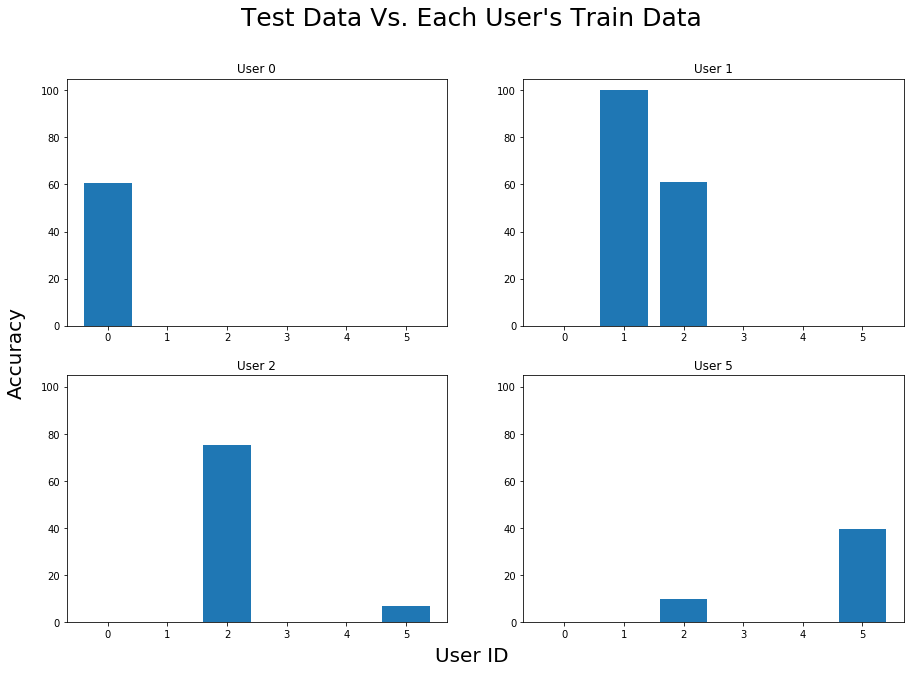

In [9]:
x = test_ids[:]
fig, (((ax1, ax2), (ax3, ax4))) = plt.subplots(2, 2, figsize=(15, 10))

ax1.bar(x, plot_data[0])
ax1.set_title("User 0")
ax1.set_ylim(0, 105)

ax2.bar(x, plot_data[1])
ax2.set_title("User 1")
ax2.set_ylim(0, 105)

ax3.bar(x, plot_data[2])
ax3.set_title("User 2")
ax3.set_ylim(0, 105)

ax4.bar(x, plot_data[5])
ax4.set_title("User 5")
ax4.set_ylim(0, 105)

fig.suptitle("Test Data Vs. Each User's Train Data", fontsize=25)
fig.text(0.5, 0.07, 'User ID', ha='center', fontsize=20)
fig.text(0.07, 0.5, 'Accuracy', va='center', rotation='vertical', 
         fontsize=20)

plt.savefig("plots/1.png")


## 2

In [29]:
glob.glob('plots/*')

['plots/1.png']

In [ ]:
os.

In [25]:
user_id = 0
roc_filenames = {}
for j in test_ids:
        roc_filenames[j] = glob.glob("test_data/user_{}/final_data/*".format(j))

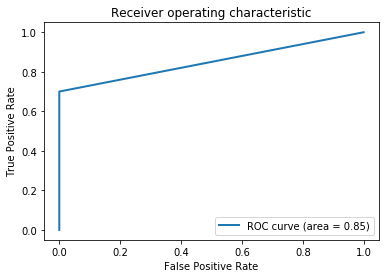

In [26]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001, tol=2)
clf.fit(train_data[user_id]['X'])

y_true = []
y_prob = []
for i in test_ids:
    if user_id == i:
        y_true.append([1] * len(roc_filenames[i]))
    else:
        y_true.append([0] * len(roc_filenames[i]))
        
    for file in roc_filenames[i]:
        df = pd.read_csv(file)
        df.pop('user')
        y_test_pred = clf.predict(df)
        unique, counts = np.unique(y_test_pred, return_counts=True)
        counts_dict = dict(zip(unique, counts))
        
        if 1 in counts_dict:
            match = (counts_dict[1] / len(y_test_pred)) * 100
        else:
            match = 0
            
        y_prob.append(match)
        
y_true = list(itertools.chain.from_iterable(y_true))

fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
    
        
    
        

In [21]:
y_true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
y_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 100.0,
 23.52941176470588,
 100.0,
 75.0,
 94.11764705882352,
 93.33333333333333,
 100.0,
 92.3076923076923,
 85.71428571428571,
 69.23076923076923,
 20.0,
 0,
 0,
 0,
 21.428571428571427,
 0,
 0]

In [14]:
# from sklearn.neighbors import LocalOutlierFactor
# for i in train_ids:
#     print(i)
    
#     clf = LocalOutlierFactor(novelty=True)
#     clf = clf.fit(train_data[i]['X'])
#     y_test_pred = clf.predict(test_data[i]['X'])

#     unique, counts = np.unique(y_test_pred, return_counts=True)
#     counts_dict = dict(zip(unique, counts))
#     if 1 in counts_dict:
#         match = (counts_dict[1] / len(y_test_pred)) * 100
#     else:
#         match = 0

#     print(match)
#     print()

In [15]:
# from sklearn.covariance import EllipticEnvelope
# for i in train_ids:
#     print(i)
    
#     clf = EllipticEnvelope(contamination=0.0)
#     clf = clf.fit(train_data[i]['X'])
#     y_test_pred = clf.predict(test_data[3]['X'])

#     unique, counts = np.unique(y_test_pred, return_counts=True)
#     counts_dict = dict(zip(unique, counts))
#     if 1 in counts_dict:
#         match = (counts_dict[1] / len(y_test_pred)) * 100
#     else:
#         match = 0

#     print(match)
#     print()